<h1>Previsão se entrevistado foi ou não internado nos ultimos 12 meses</h2>

<a>A intenção do trabalho é procurar fatores de risco que podem aumentar o risco de internação</a>

### Atributos utilizados 
J037 : Nos últimos 12 meses, ficou internado(a) em hospital por 24 horas ou mais (classe alvo)

J012: Quantas vezes consultou um médico nos últimos 12 meses

C009: Cor ou raça

C008: Idade do morador na data de referência

C006: Sexo

P050: Atualmente, o(a) Sr(a) fuma algum produto do tabaco?

P03201: Nos últimos trinta dias, o(a) Sr(a) chegou a consumir cinco ou mais doses de bebida alcoólica em uma única ocasião?

Q11604: Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?

N001: Em geral, como o(a) Sr(a) avalia a sua saúde

Q018013: Praticar atividade física regular

Q06306: Algum médico já lhe deu o diagnóstico de uma doença do coração, tal como infarto, angina, insuficiência cardíaca ou outra?

Q068：Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?

Q074: Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?

Q079: Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?

Q092: Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?

Q11006: Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?

Q120：Algum médico já lhe deu diagnóstico de câncer?

J046: Nos últimos 12 meses, teve atendimento de urgência ou emergência no domicílio

P02602: Em quantos dias da semana o(a) Sr(a) costuma substituir a refeição do almoço por lanches rápidos como sanduíches, salgados, pizza, cachorro quente, etc?

P02601: Considerando a comida preparada na hora e os alimentos industrializados, o(a) Sr(a) acha que o seu consumo de sal é

K04301: Faz uso de algum medicamento, que foi receitado por um médico, para uso regular ou contínuo

P02501: Em quantos dias da semana o(a) Sr(a) costuma comer alimentos doces como biscoito/bolacha recheado, chocolate, gelatina, balas e outros?

Q00201: Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?

P027: Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?

I00403: O plano de saúde (único ou principal) de assistência médica que possui dá direito a internações

J01101: Quando consultou um médico pela última vez

<h3>Importações</h3>

In [24]:
import pandas as pd
import numpy as np
import logging
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from imblearn.under_sampling import RandomUnderSampler

<h3>Carregando base

In [25]:
# Carregar os dados
df = pd.read_csv('pns2019.csv')

In [26]:
# Dados filtrados para o problema
dados = {
    'J037': 'Internacao_12_Meses', # Alvo
    'C009': 'Raca_Cor',
    'J007': 'Doenca_Cronica',
    'C008': 'Idade',
    'C006': 'Genero',
    'P050': 'Tabagismo',
    'P03201': 'Excessivo_Alcool',
    'J012':  'Numero_Consultas_Ultimo_Ano',
    'Q11604': 'Doenca_Pulmonar_Cronica',
    'N001': 'Como_Avalia_Saude',
    'P005': 'Gravida',
    'Q018013': 'Pratica_Atividade_Fisica_Regular',
    'Q06306': 'Doenca_Cardiovascular',
    'Q068': 'AVC',
    'Q074': 'Asma',
    'Q079': 'Artrite',
    'Q092': 'Depressao',
    'Q11006': 'Outro_Transtorno_Mental',
    'Q120': 'Cancer',
    'Q00201': 'Hipertensao',
    'Q124': 'Insuficiencia_Renal',
    'J046': 'Atendimento_Urgencia_Domicilio',
    'P02602': 'Freq_Troca_Almoco_Por_Fast_Food',
    'P02601': 'Freq_Consumo_Sal',
    'K04301': 'Freq_Uso_medicamentos',
    'P02501': 'Freq_Consumo_Doce',
    'P027': 'Freq_bebida_alcoolica',
    'I00403': 'Plano_Saude_Cobre_Internacao',
    'J01101': 'Saude_Tempo_Ultima_Consulta_Anos'
    }

# Separação dos atributos por categoria

# Dados categoricos
categoricos = [
    'Raca_Cor',
    'Doenca_Cronica',
    'Genero',
    'Tabagismo',
    'Excessivo_Alcool',
    'Doenca_Pulmonar_Cronica',
    'Como_Avalia_Saude',
    'Pratica_Atividade_Fisica_Regular',
    'Doenca_Cardiovascular',
    'AVC',
    'Asma',
    'Artrite',
    'Depressao',
    'Outro_Transtorno_Mental',
    'Cancer',
    'Insuficiencia_Renal',
    'Atendimento_Urgencia_Domicilio',
    'Hipertensao',
    'Plano_Saude_Cobre_Internacao'
]

# Dados ordinais
ordinais = [
    'Idade',
    'Freq_Troca_Almoco_Por_Fast_Food',
    'Freq_Consumo_Sal',
    'Freq_Uso_medicamentos',
    'Freq_Consumo_Doce',
    'Freq_bebida_alcoolica'
    ]

# Dados numericos
numericos = [
    'Numero_Consultas_Ultimo_Ano',
    'Saude_Tempo_Ultima_Consulta_Anos'
    ]

# Filtrar as colunas usando as chaves do dicionário de renomeação
df_filtered = df.filter(dados.keys())

# Renomear as colunas com base no dicionário
df_filtered = df_filtered.rename(columns=dados)

# Eliminar gravidas, já que subentende internação
df_filtered = df_filtered[df_filtered['Gravida'] != 1]
df_filtered = df_filtered.drop(columns=['Gravida'])

# Eliminar colunas com target nulo
df_filtered = df_filtered.dropna(subset=['Internacao_12_Meses'])

# Exibir as primeiras linhas do dataframe para verificar
print(df_filtered.head())

   Internacao_12_Meses  Raca_Cor  Doenca_Cronica  Idade  Genero  Tabagismo  \
0                  2.0       1.0             1.0   55.0     2.0        3.0   
1                  2.0       4.0             1.0   69.0     1.0        NaN   
2                  2.0       2.0             2.0   31.0     1.0        NaN   
3                  2.0       2.0             2.0    9.0     1.0        NaN   
4                  2.0       4.0             2.0    6.0     2.0        NaN   

   Excessivo_Alcool  Numero_Consultas_Ultimo_Ano  Doenca_Pulmonar_Cronica  \
0               2.0                          2.0                      2.0   
1               NaN                          2.0                      NaN   
2               NaN                          1.0                      NaN   
3               NaN                          1.0                      NaN   
4               NaN                          1.0                      NaN   

   Como_Avalia_Saude  ...  Hipertensao  Insuficiencia_Renal  \
0    

Checar nulos

In [27]:
# Verificar a quantidade de valores nulos em cada coluna
null_counts = df_filtered.isnull().sum()

# Exibir o resultado
print(null_counts)

Internacao_12_Meses                      0
Raca_Cor                                 0
Doenca_Cronica                           0
Idade                                    0
Genero                                   0
Tabagismo                           188536
Excessivo_Alcool                    243309
Numero_Consultas_Ultimo_Ano          72967
Doenca_Pulmonar_Cronica             188536
Como_Avalia_Saude                   188536
Pratica_Atividade_Fisica_Regular    259521
Doenca_Cardiovascular               188536
AVC                                 188536
Asma                                188536
Artrite                             188536
Depressao                           188536
Outro_Transtorno_Mental             188536
Cancer                              188536
Hipertensao                         190642
Insuficiencia_Renal                 188536
Atendimento_Urgencia_Domicilio           0
Freq_Troca_Almoco_Por_Fast_Food     188536
Freq_Consumo_Sal                    188536
Freq_Uso_me

O filtro para os NaN vai ser 70%. Os que passarem serão imputados.

In [28]:
# Calcular a proporção de valores nulos em cada coluna
percentual_nulos = df_filtered.isnull().mean()

# Filtrar as colunas que têm menos de 70% de valores nulos
colunas_validas = percentual_nulos[percentual_nulos < 0.70].index

# Manter apenas as colunas que têm menos de 70% de valores nulos
df_filtered = df_filtered[colunas_validas]

# Exibir as primeiras linhas do dataframe para verificar
print(df_filtered.head())

# Atualizar as listas de categorias removendo elementos com mais de 70% de nulos
categoricos = [col for col in categoricos if col in colunas_validas]
ordinais = [col for col in ordinais if col in colunas_validas]
numericos = [col for col in numericos if col in colunas_validas]

   Internacao_12_Meses  Raca_Cor  Doenca_Cronica  Idade  Genero  Tabagismo  \
0                  2.0       1.0             1.0   55.0     2.0        3.0   
1                  2.0       4.0             1.0   69.0     1.0        NaN   
2                  2.0       2.0             2.0   31.0     1.0        NaN   
3                  2.0       2.0             2.0    9.0     1.0        NaN   
4                  2.0       4.0             2.0    6.0     2.0        NaN   

   Numero_Consultas_Ultimo_Ano  Doenca_Pulmonar_Cronica  Como_Avalia_Saude  \
0                          2.0                      2.0                3.0   
1                          2.0                      NaN                NaN   
2                          1.0                      NaN                NaN   
3                          1.0                      NaN                NaN   
4                          1.0                      NaN                NaN   

   Doenca_Cardiovascular  ...  Outro_Transtorno_Mental  Cancer

Será usado mediana para valores numericos/ordinais, e moda (most_frequent) para valores categóricos

In [29]:
# Imputando valores numericos/categoricos faltantes
imputer_median = SimpleImputer(strategy='median')
df_filtered[ordinais] = imputer_median.fit_transform(df_filtered[ordinais])
df_filtered[numericos] = imputer_median.fit_transform(df_filtered[numericos])

# Imputando valores categoricos faltantes
imputer_mode = SimpleImputer(strategy='most_frequent')
df_filtered[categoricos] = imputer_mode.fit_transform(df_filtered[categoricos])

In [30]:
# Verificar a quantidade de valores nulos em cada coluna
null_counts = df_filtered.isnull().sum()

# Exibir o resultado
print(null_counts)

# Binarizar o alvos
mediana = df_filtered['Internacao_12_Meses'].median()
df_filtered['Internacao_12_Meses'] = df_filtered['Internacao_12_Meses'].apply(lambda x: 1 if x >= mediana else 0)

Internacao_12_Meses                 0
Raca_Cor                            0
Doenca_Cronica                      0
Idade                               0
Genero                              0
Tabagismo                           0
Numero_Consultas_Ultimo_Ano         0
Doenca_Pulmonar_Cronica             0
Como_Avalia_Saude                   0
Doenca_Cardiovascular               0
AVC                                 0
Asma                                0
Artrite                             0
Depressao                           0
Outro_Transtorno_Mental             0
Cancer                              0
Hipertensao                         0
Insuficiencia_Renal                 0
Atendimento_Urgencia_Domicilio      0
Freq_Troca_Almoco_Por_Fast_Food     0
Freq_Consumo_Sal                    0
Freq_Consumo_Doce                   0
Freq_bebida_alcoolica               0
Saude_Tempo_Ultima_Consulta_Anos    0
dtype: int64


### Box Plot dos atributos para detecção de outliers

Muitos problemas de saúde afetam uma pequena parte da população, então é esperado outliers

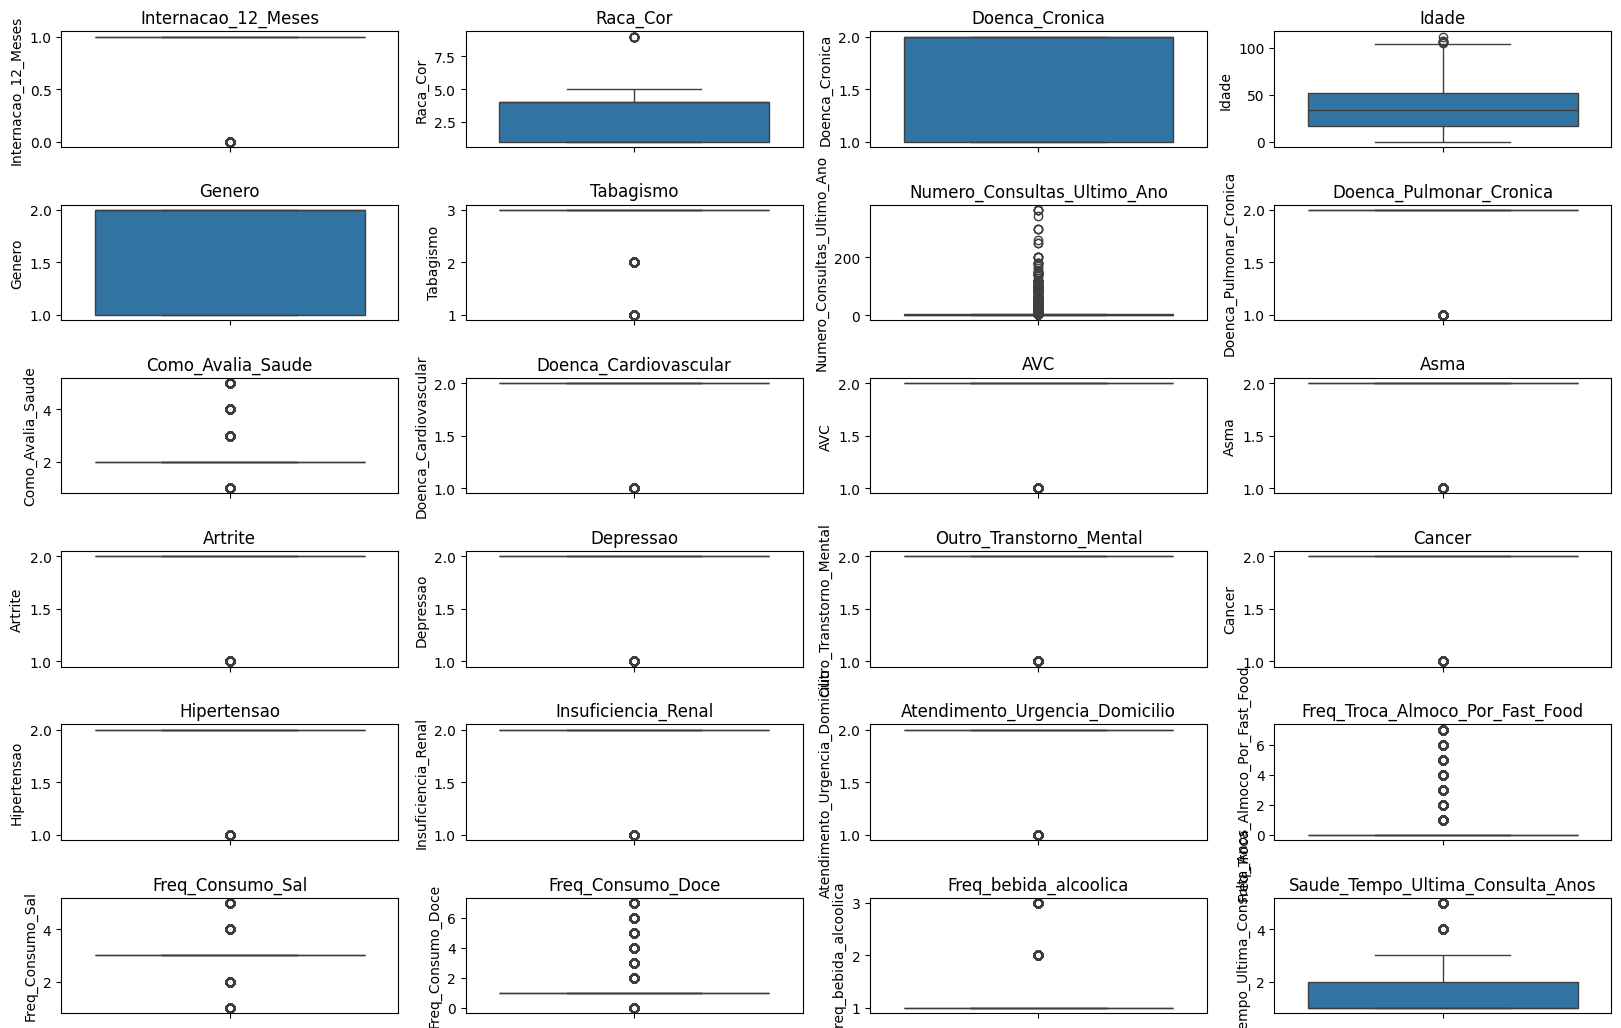

In [31]:
# Definir o número de linhas e colunas para o grid de boxplots
num_cols = 4  # Número de colunas no grid
num_rows = (len(df_filtered.columns) // num_cols) + 1  # Calcular o número de linhas com base no número de colunas

# Criar o grid de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.5)

# Loop sobre as colunas e plotar cada boxplot em um subplot
for i, column in enumerate(df_filtered.columns):
    row = i // num_cols  # Determinar a linha no grid
    col = i % num_cols   # Determinar a coluna no grid
    sns.boxplot(data=df_filtered[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remover subplots vazios, caso o número de colunas não seja divisível
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Exibir o gráfico
plt.show()

### Faremos um balanceamento já que o número de 1 é quase 20x maior que o número de 0.

In [32]:
# Separando df X e y
X = df_filtered.drop(columns=['Internacao_12_Meses'])
y = df_filtered['Internacao_12_Meses']

Armazenando conjunto desbalanceado para usar para teste depois

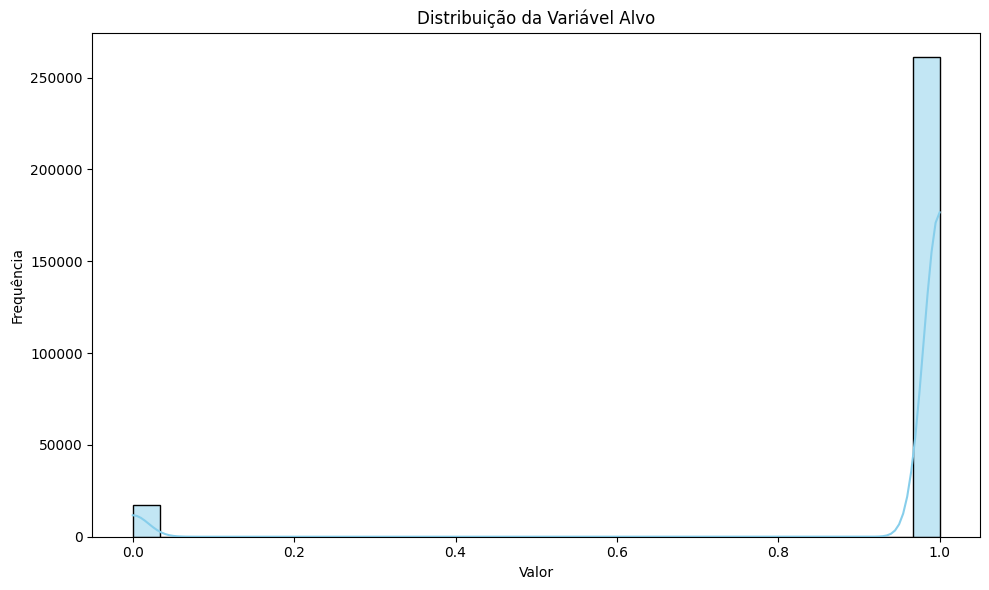

In [33]:
# Verificando desbalanceamento
plt.figure(figsize=(10,6))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title("Distribuição da Variável Alvo")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

Finalmente, balanceando

In [34]:
# Concatenando features e variável alvo para realizar o balanceamento
df = pd.concat([X, y], axis=1)
class_counts = y.value_counts()
min_count = class_counts.min()

# Separando as classes majoritária e minoritária
df_majority = df[df[y.name] == class_counts.idxmax()]
df_minority = df[df[y.name] == class_counts.idxmin()]

# Realizando downsample da classe majoritária (reduzindo o número de amostras)
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=min_count,
    random_state=42
)

# Combinando a classe majoritária balanceada com a classe minoritária
df_balanceado = pd.concat([df_majority_downsampled, df_minority])

# Embaralhando o conjunto de dados balanceado
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

# Separando novamente as features e a variável alvo após o balanceamento
X_balanceado = df_balanceado.drop(columns=y.name)
y_balanceado = df_balanceado[y.name]

### Distribuição após o balanceamento

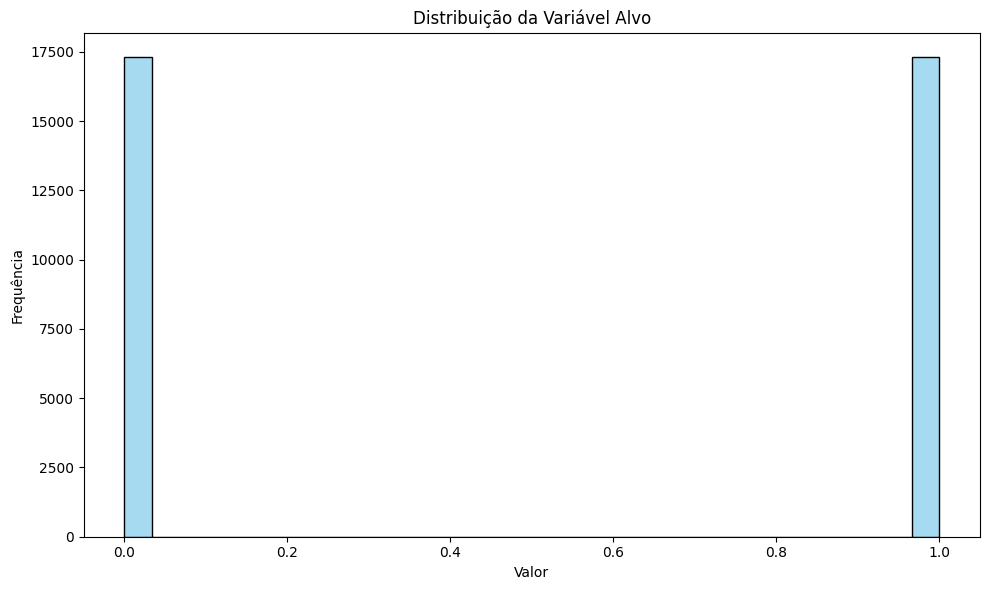

In [35]:
# Grafico do alvo
plt.figure(figsize=(10,6))
sns.histplot(y_balanceado, bins=30, color='skyblue')
plt.title("Distribuição da Variável Alvo")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

### Normalizando dados de treino

In [36]:
# Normalizando dados de treino
#scaler = StandardScaler()
#X_balanceado_normalized = scaler.fit_transform(X_balanceado)
#X_balanceado_normalized = pd.DataFrame(X_balanceado_normalized, columns=X_balanceado.columns)

### Train test split balanceado

In [37]:
# Dividindo o conjunto balanceado em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceado, y_balanceado,
    test_size=0.2,
    random_state=42,
    stratify=y_balanceado
)

### Visualizando correlação de atributos

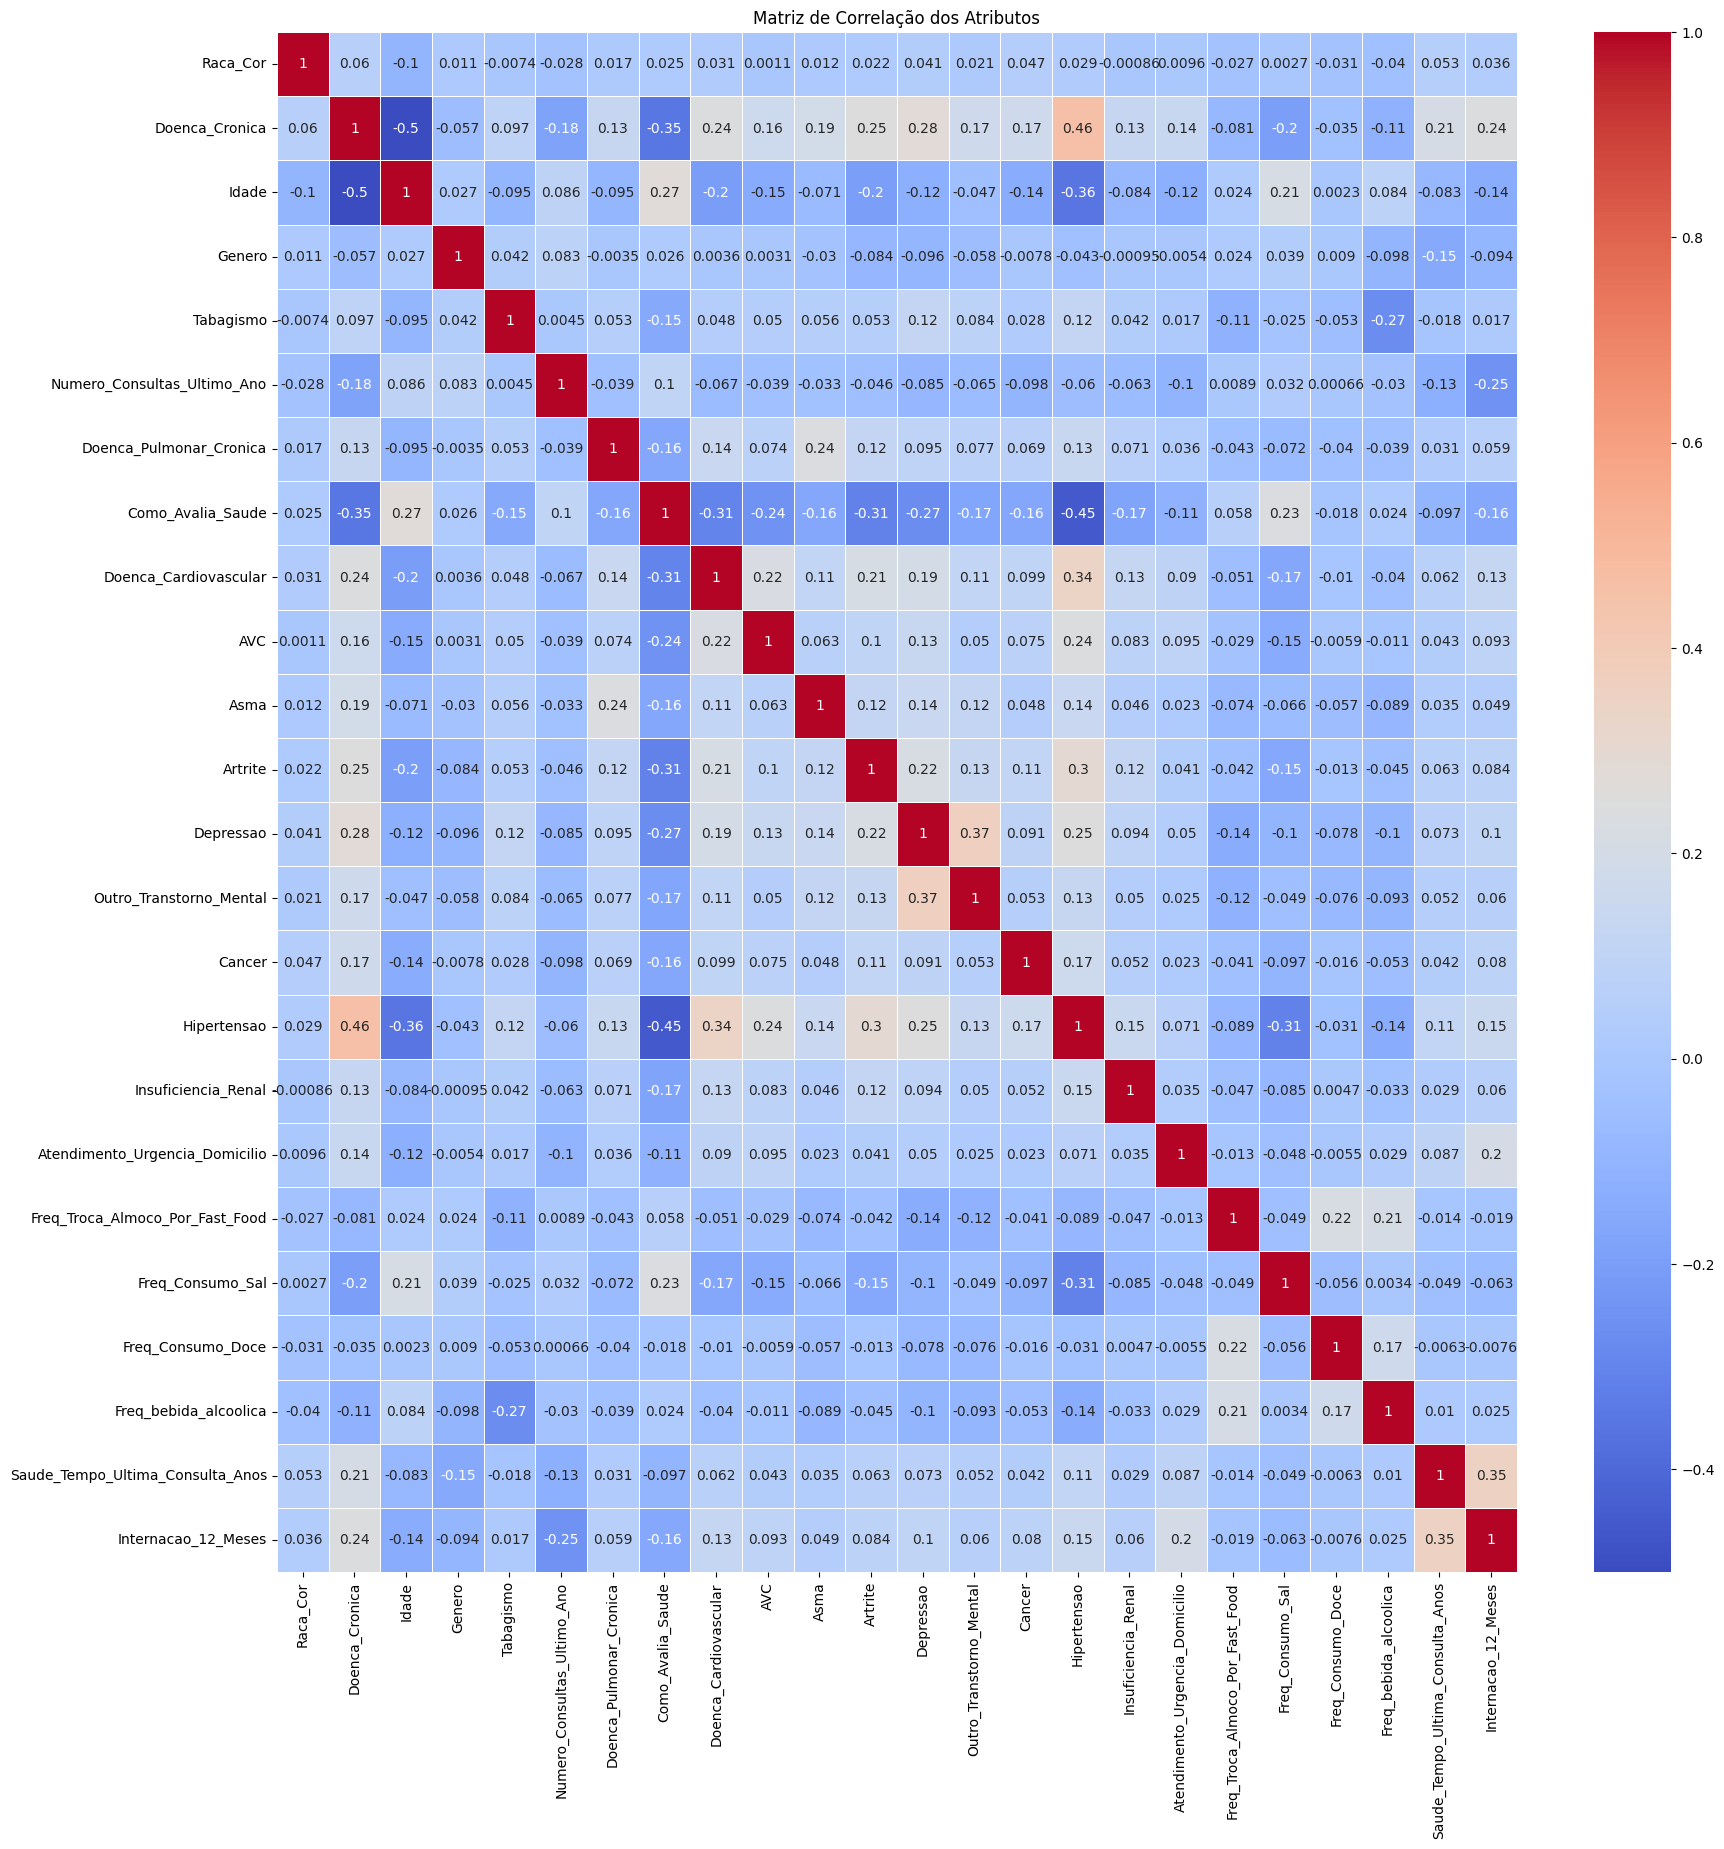

In [38]:
df_balanceado = pd.concat([X_balanceado, y_balanceado], axis=1)
correlacao = df_balanceado.corr()
plt.figure(figsize=(20, 20))  # Ajustar o tamanho do gráfico
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação dos Atributos')
plt.show()

Analisando correlações

In [39]:
# Filtrar as correlações relacionadas à variável alvo 'Internacao_12_Meses'
correlacao_alvo = correlacao['Internacao_12_Meses']

# Ordenar as correlações por valor absoluto, do mais relacionado ao menos relacionado
correlacao_alvo_ordenada = correlacao_alvo.abs().sort_values(ascending=False)

# Exibir as correlações mais fortes
print("Atributos mais relacionados com 'Internacao_12_Meses':")
print(correlacao_alvo_ordenada[1:])

Atributos mais relacionados com 'Internacao_12_Meses':
Saude_Tempo_Ultima_Consulta_Anos    0.350107
Numero_Consultas_Ultimo_Ano         0.251969
Doenca_Cronica                      0.239498
Atendimento_Urgencia_Domicilio      0.198791
Como_Avalia_Saude                   0.158657
Hipertensao                         0.147123
Idade                               0.140165
Doenca_Cardiovascular               0.125130
Depressao                           0.099987
Genero                              0.094142
AVC                                 0.093247
Artrite                             0.084009
Cancer                              0.080210
Freq_Consumo_Sal                    0.063499
Insuficiencia_Renal                 0.059942
Outro_Transtorno_Mental             0.059734
Doenca_Pulmonar_Cronica             0.059004
Asma                                0.048767
Raca_Cor                            0.035817
Freq_bebida_alcoolica               0.024547
Freq_Troca_Almoco_Por_Fast_Food     0.019045


In [40]:
X_train

,Raca_Cor,Doenca_Cronica,Idade,Genero,Tabagismo,Numero_Consultas_Ultimo_Ano,Doenca_Pulmonar_Cronica,Como_Avalia_Saude,Doenca_Cardiovascular,AVC,...,Outro_Transtorno_Mental,Cancer,Hipertensao,Insuficiencia_Renal,Atendimento_Urgencia_Domicilio,Freq_Troca_Almoco_Por_Fast_Food,Freq_Consumo_Sal,Freq_Consumo_Doce,Freq_bebida_alcoolica,Saude_Tempo_Ultima_Consulta_Anos
28916,4.0,1.0,59.0,2.0,1.0,10.0,2.0,2.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,0.0,4.0,7.0,1.0,1.0
14394,1.0,2.0,23.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,1.0,1.0
25084,4.0,2.0,25.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0
9247,2.0,1.0,40.0,1.0,1.0,4.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,0.0,4.0,1.0,1.0,1.0
26557,4.0,2.0,10.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21558,1.0,2.0,26.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0
13605,4.0,2.0,23.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,6.0,3.0,1.0
34345,4.0,2.0,62.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,4.0
1452,1.0,2.0,17.0,2.0,3.0,11.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0


In [41]:
X_test

,Raca_Cor,Doenca_Cronica,Idade,Genero,Tabagismo,Numero_Consultas_Ultimo_Ano,Doenca_Pulmonar_Cronica,Como_Avalia_Saude,Doenca_Cardiovascular,AVC,...,Outro_Transtorno_Mental,Cancer,Hipertensao,Insuficiencia_Renal,Atendimento_Urgencia_Domicilio,Freq_Troca_Almoco_Por_Fast_Food,Freq_Consumo_Sal,Freq_Consumo_Doce,Freq_bebida_alcoolica,Saude_Tempo_Ultima_Consulta_Anos
27855,1.0,1.0,30.0,1.0,3.0,3.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0
32826,4.0,1.0,72.0,2.0,3.0,8.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,0.0,4.0,0.0,1.0,1.0
5834,1.0,1.0,74.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,1.0,1.0
17395,1.0,1.0,77.0,1.0,3.0,10.0,2.0,4.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,4.0,0.0,1.0,1.0
16503,4.0,2.0,48.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18483,4.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0
289,1.0,2.0,17.0,2.0,3.0,6.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0
18614,4.0,2.0,16.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0
30193,4.0,1.0,76.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,1.0,1.0


In [42]:
y_train

28916    0
14394    0
25084    0
9247     1
26557    1
        ..
21558    1
13605    1
34345    1
1452     0
5372     0
Name: Internacao_12_Meses, Length: 27713, dtype: int64

In [43]:
y_test

27855    1
32826    0
5834     1
17395    0
16503    1
        ..
18483    1
289      0
18614    0
30193    0
3803     0
Name: Internacao_12_Meses, Length: 6929, dtype: int64

### Definindo preprocessor, que fará o encode dos atributos usando OneHot, Ordinal e Standart

In [44]:
# Definir o pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericos),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinais),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categoricos)
    ],
    remainder='drop'
)

### Treinando


Treinando o modelo: Árvore de Decisão


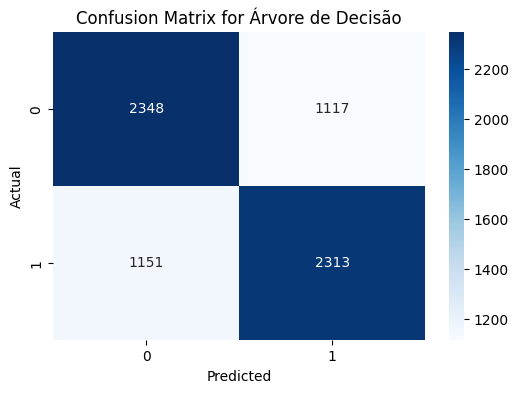

Relatório de Classificação para Árvore de Decisão:

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3465
           1       0.67      0.67      0.67      3464

    accuracy                           0.67      6929
   macro avg       0.67      0.67      0.67      6929
weighted avg       0.67      0.67      0.67      6929

Accuracy: 0.6727
ROC-AUC: 0.6931

Treinando o modelo: Floresta Aleatória


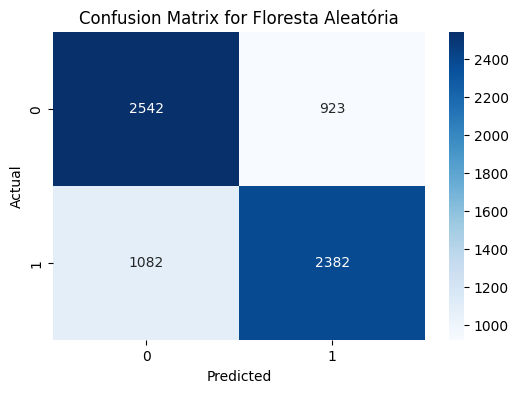

Relatório de Classificação para Floresta Aleatória:

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      3465
           1       0.72      0.69      0.70      3464

    accuracy                           0.71      6929
   macro avg       0.71      0.71      0.71      6929
weighted avg       0.71      0.71      0.71      6929

Accuracy: 0.7106
ROC-AUC: 0.7868

Treinando o modelo: Rede Neural MLP


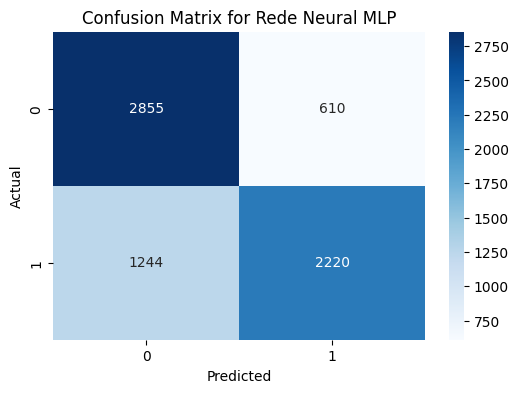

Relatório de Classificação para Rede Neural MLP:

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3465
           1       0.78      0.64      0.71      3464

    accuracy                           0.73      6929
   macro avg       0.74      0.73      0.73      6929
weighted avg       0.74      0.73      0.73      6929

Accuracy: 0.7324
ROC-AUC: 0.8151


In [45]:
# Classificadores
classificadores = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42,max_depth=30, criterion='gini'),
    'Floresta Aleatória': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=30),
    'Rede Neural MLP': MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes=(50,))
}

# Passar por cada classificador
for nome, classificador in classificadores.items():
    print(f"\nTreinando o modelo: {nome}")

    # Criar a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classificador)
    ])

    pipeline.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Matriz de confusao
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {nome}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"Relatório de Classificação para {nome}:\n")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    if len(set(y_test)) == 2:
        auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
        print(f"ROC-AUC: {auc:.4f}")